Data Overview:
   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street     Alley  LotShape  \
0   1          60       3.0         65.0     8450       2  0.450549       3.0   
1   2          20       3.0         80.0     9600       2  0.450549       3.0   
2   3          60       3.0         68.0    11250       2  0.450549       0.0   
3   4          70       3.0         60.0     9550       2  0.450549       0.0   
4   5          60       3.0         84.0    14260       2  0.450549       0.0   

   LandContour  Utilities  ...  PoolArea    PoolQC     Fence  MiscFeature  \
0          3.0        0.0  ...         0  1.142857  1.427046     1.907407   
1          3.0        0.0  ...         0  1.142857  1.427046     1.907407   
2          3.0        0.0  ...         0  1.142857  1.427046     1.907407   
3          3.0        0.0  ...         0  1.142857  1.427046     1.907407   
4          3.0        0.0  ...         0  1.142857  1.427046     1.907407   

   MiscVal  MoSold  YrSold  SaleTyp

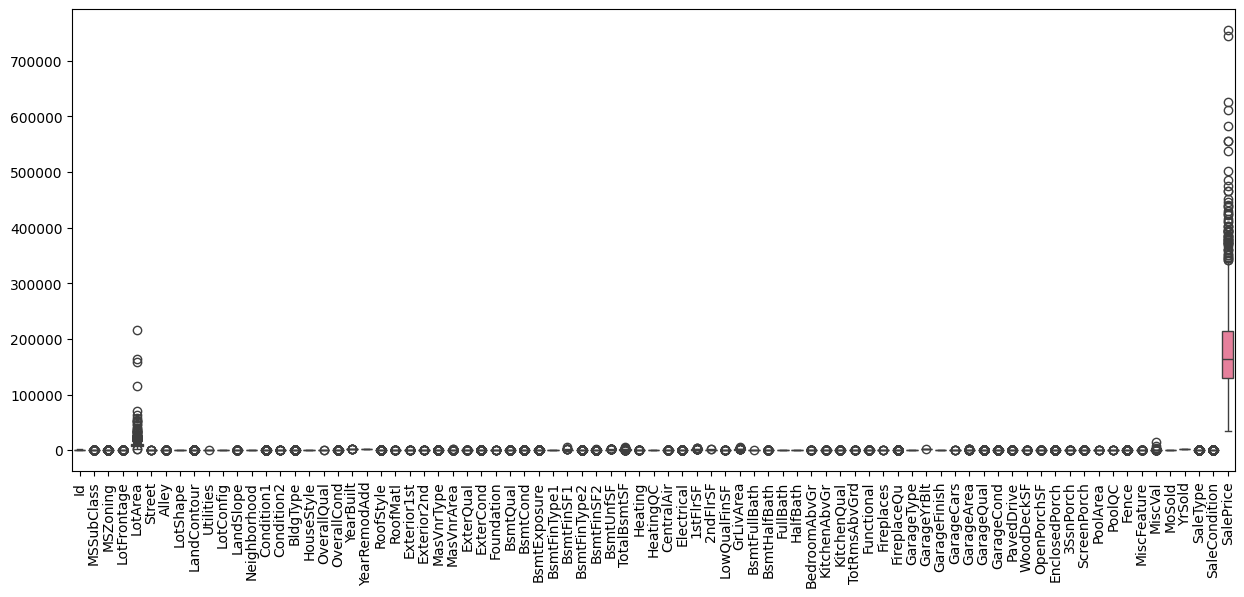

Linear Regression: MSE = 1263833752.5469, R² = 0.8352


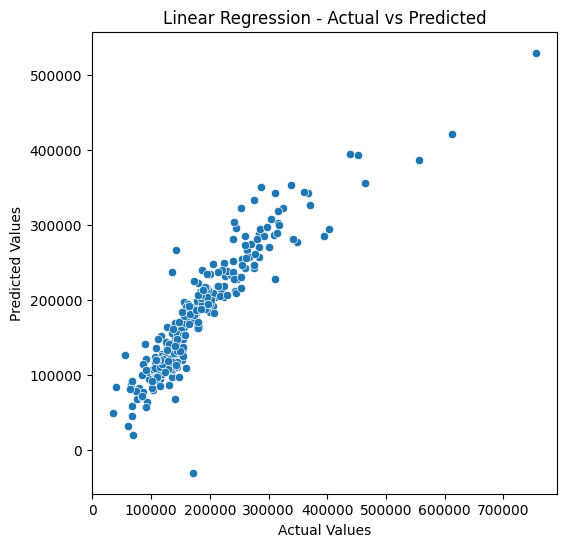

Polynomial Regression (Degree 2): MSE = 2726159556.4661, R² = 0.6446


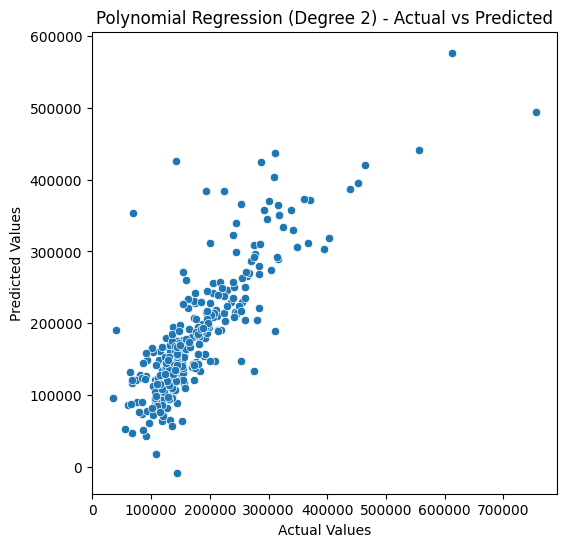

Polynomial Regression (Degree 3): MSE = 991057400.2290, R² = 0.8708


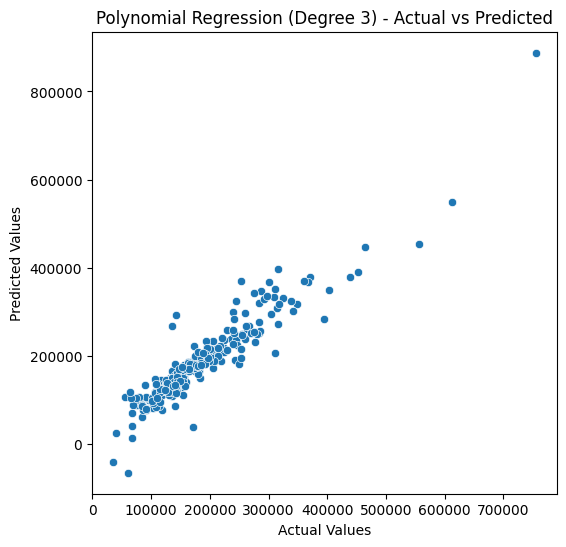

KNN Regression (k=3): MSE = 2041473879.8584, R² = 0.7338


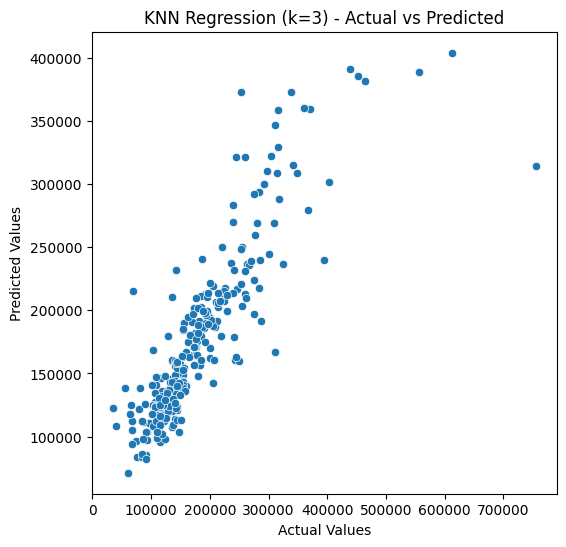

KNN Regression (k=5): MSE = 1626773551.2874, R² = 0.7879
KNN Regression (k=7): MSE = 1672772318.3743, R² = 0.7819
                   Model           MSE        R²
0      Linear Regression  1.263834e+09  0.835231
1  Polynomial (Degree 2)  2.726160e+09  0.644584
2  Polynomial (Degree 3)  9.910574e+08  0.870793
3              KNN (k=3)  2.041474e+09  0.733848
4              KNN (k=5)  1.626774e+09  0.787913
5              KNN (k=7)  1.672772e+09  0.781916


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mengatasi peringatan joblib di Windows
os.environ["LOKY_MAX_CPU_COUNT"] = "1"

# Load Dataset
df = pd.read_csv('dataset_encoded.csv')

# Data Understanding
def data_summary(df):
    print("Data Overview:")
    print(df.head())
    print("\nStatistical Summary:")
    print(df.describe())
    print("\nAdditional Statistics:")
    print(df.median())
    print(df.quantile([0.25, 0.5, 0.75]))
    print("\nMissing Values:")
    print(df.isnull().sum())

def handle_missing_values(df):
    df.fillna(df.mean(), inplace=True)  # Mengisi nilai kosong dengan rata-rata
    return df

# Data Preprocessing
def split_data(df, target_column):
    X = df.drop(columns=[target_column, 'Id'])  # Hapus kolom ID agar tidak mempengaruhi model
    Y = df[target_column]
    return train_test_split(X, Y, test_size=0.2, random_state=42)

# Outlier Handling
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

def visualize_outliers(df):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)
    plt.show(block=True)

# Feature Scaling
def scale_features(X_train, X_test):
    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    X_train_std = std_scaler.fit_transform(X_train)
    X_test_std = std_scaler.transform(X_test)

    X_train_minmax = minmax_scaler.fit_transform(X_train)
    X_test_minmax = minmax_scaler.transform(X_test)

    return X_train_std, X_test_std, X_train_minmax, X_test_minmax

# Regression Models
def train_linear_regression(X_train, Y_train, X_test, Y_test):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return evaluate_model(Y_test, Y_pred, "Linear Regression"), Y_pred

def train_polynomial_regression(X_train, Y_train, X_test, Y_test, degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    Y_pred = model.predict(X_test_poly)
    return evaluate_model(Y_test, Y_pred, f"Polynomial Regression (Degree {degree})"), Y_pred

def train_knn_regression(X_train, Y_train, X_test, Y_test, k):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    return evaluate_model(Y_test, Y_pred, f"KNN Regression (k={k})"), Y_pred

# Evaluation
def evaluate_model(Y_test, Y_pred, model_name):
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print(f"{model_name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    return mse, r2

def plot_results(Y_test, Y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=Y_test, y=Y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.show(block=True)

if __name__ == "__main__":
    df = handle_missing_values(df)
    data_summary(df)
    visualize_outliers(df)
    X_train, X_test, Y_train, Y_test = split_data(df, 'SalePrice')
    X_train_std, X_test_std, X_train_minmax, X_test_minmax = scale_features(X_train, X_test)

    # Linear Regression
    (lr_mse, lr_r2), Y_pred_lr = train_linear_regression(X_train_std, Y_train, X_test_std, Y_test)
    plot_results(Y_test, Y_pred_lr, "Linear Regression")

    # Polynomial Regression
    (pr_mse_2, pr_r2_2), Y_pred_pr2 = train_polynomial_regression(X_train_std, Y_train, X_test_std, Y_test, 2)
    plot_results(Y_test, Y_pred_pr2, "Polynomial Regression (Degree 2)")
    (pr_mse_3, pr_r2_3), Y_pred_pr3 = train_polynomial_regression(X_train_std, Y_train, X_test_std, Y_test, 3)
    plot_results(Y_test, Y_pred_pr3, "Polynomial Regression (Degree 3)")

    # KNN Regression
    (knn_mse_3, knn_r2_3), Y_pred_knn3 = train_knn_regression(X_train_std, Y_train, X_test_std, Y_test, 3)
    plot_results(Y_test, Y_pred_knn3, "KNN Regression (k=3)")
    (knn_mse_5, knn_r2_5), Y_pred_knn5 = train_knn_regression(X_train_std, Y_train, X_test_std, Y_test, 5)
    (knn_mse_7, knn_r2_7), Y_pred_knn7 = train_knn_regression(X_train_std, Y_train, X_test_std, Y_test, 7)

    # Summary Table
    comparison_df = pd.DataFrame({
        "Model": ["Linear Regression", "Polynomial (Degree 2)", "Polynomial (Degree 3)", "KNN (k=3)", "KNN (k=5)", "KNN (k=7)"],
        "MSE": [lr_mse, pr_mse_2, pr_mse_3, knn_mse_3, knn_mse_5, knn_mse_7],
        "R²": [lr_r2, pr_r2_2, pr_r2_3, knn_r2_3, knn_r2_5, knn_r2_7]
    })
    print(comparison_df)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
